## Red Wine Quality Prediction Project

**Practice Project Submitted By Bisola Beauty Ayankoya**

## Project Description

The dataset pertains to the red and white variations of Vinho Verde, a type of Portuguese wine. To address concerns related to privacy and logistics, only physicochemical variables are available as inputs, while sensory variables are provided as outputs. Notably, information regarding grape varieties, wine brands, and selling prices is not included in the dataset.

**Motivation** - Use of Machine Learning to determine which physiochemical properties make a wine 'good'!

In [1]:
# Import all required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
# Importing Dataset 
df = pd.read_csv('https://github.com/FlipRoboTechnologies/ML-Datasets/raw/main/Red%20Wine/winequality-red.csv')
df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
#Looking out for the Dataset dimension
df.shape

(1599, 12)

As indicated above haven taken a look at the dimension, the dataset include 1,599 rows and 12 columns.Hence,1 is a target variable while 11 are independent variables.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


The dataset contains two types of data: int64 and float64. The dataset attributes indicate the data types of each column, with only the 'quality' column being designated as 'integer,' while the others are labeled as 'floats.'

In [7]:
#check for null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

The output reveals that there are no missing values present in any of the columns.

In [8]:
# Check No.of unique values within each of the column
df.nunique().to_frame("No.of unique values")

,No.of unique values
fixed acidity,96
volatile acidity,143
citric acid,80
residual sugar,91
chlorides,153
free sulfur dioxide,60
total sulfur dioxide,144
density,436
pH,89
sulphates,96


In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**This provides statistical data for the numerical columns. The dataset summary appears to be satisfactory, as there are no negative or invalid values present**.

Hence,from the above description, we can observe the following-:

1. The counts of all the columns are the same i.e.1599 which means there are no missing values in the dataset.
2. The dataset shows the mean, Standard deviation(**std**), minimum(**min**), lower(**25%**), median(**50%**) and the upper quartile(**75%**),then the maximum value of each column.
3. The mean value is greater than the median(50%) in all the column except for density,which indicates that the data is skewed to right in these columns.
4. The data in the column density have mean value less than median which means the data is skewed to left.
5. By summarizing the data we can observe that there are some huge differences between 75%(Q3) and max hence there are outliers   present in the data.
6. We can also notice the Standard deviation,min,25%(Q1) percentile from this describe method.

In [10]:
# Skewness
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

**Observation**-:
We identified that a few variables, including **residual sugar** and **chlorides**, exhibit high skewness values. This suggests that these variables are not distributed evenly, indicating the necessity to address the skewness, beginning with the variable exhibiting the highest value (i.e., residual sugar).

**Removing Skewness Using cuberoot**

In [11]:
#Remove the skewness for residual sugar
df['residual sugar'] = np.cbrt(df['residual sugar'])

In [12]:
#Remove the skewness for chlorides
df['chlorides'] = np.cbrt(df['chlorides'])

In [13]:
# Lets check for Skewness again
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          2.532201
chlorides               3.059529
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

We have successfully removed the skewness using cube root method

<AxesSubplot:>

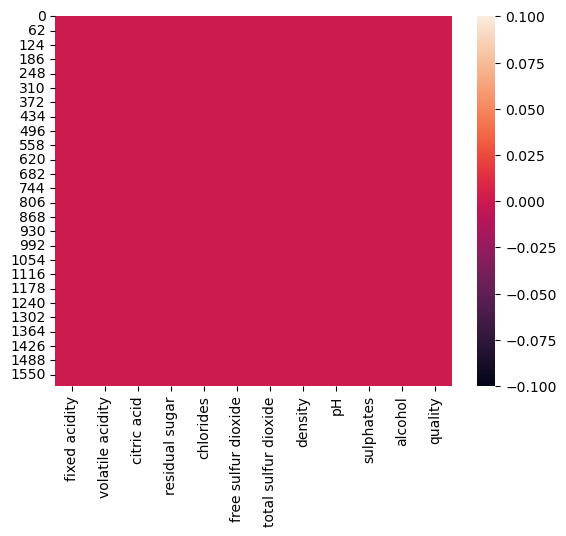

In [14]:
#Visualizing using heatmap
sns.heatmap(df.isnull())

In [15]:
# Checking the unique value of target column(quality)
df["quality"].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [16]:
# Number of target variable Count
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

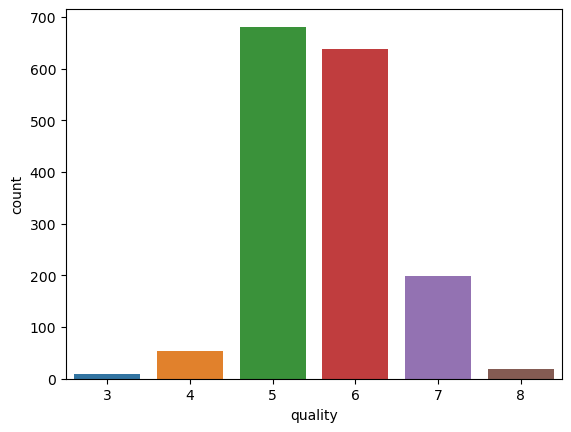

In [17]:
# target variable(quality) frequency
sns.countplot(x='quality', data=df)

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

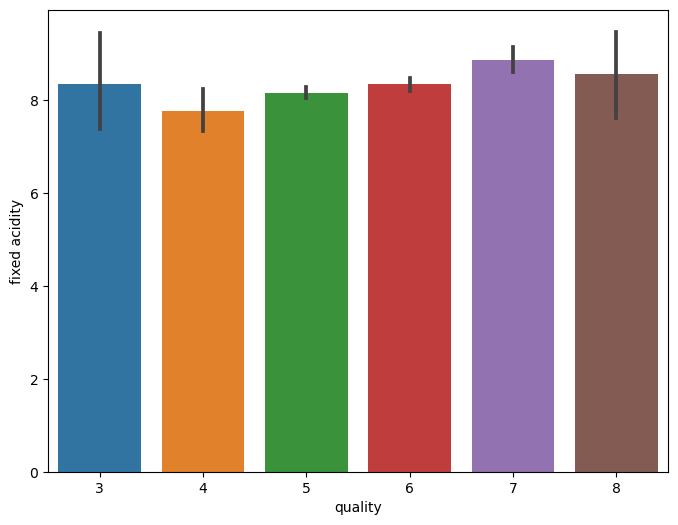

In [18]:
# Lets Create histograms for each variable in relation to the 'quality' of wine
fig = plt.figure(figsize = (8,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = df)

**Findings**: Indicates that an increase in fixed acidity corresponds to an improvement in wine quality up to a certain threshold of 7. This suggests that fixed acidity is a significant physiochemical characteristic that influences the quality of wine.

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

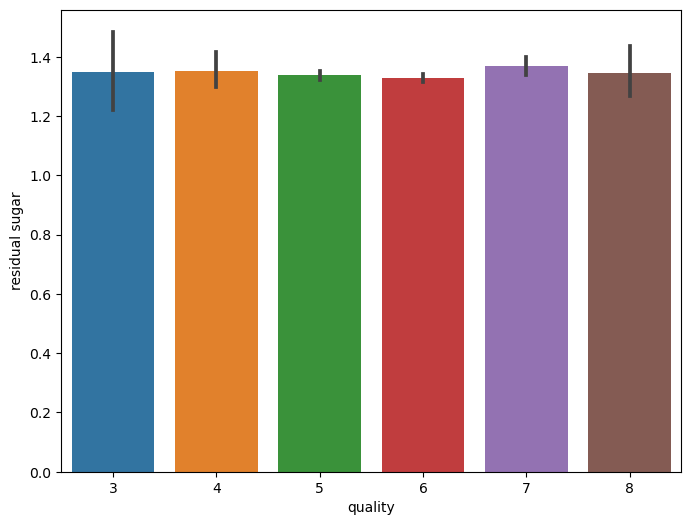

In [19]:
fig = plt.figure(figsize = (8,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = df)

**Observation**: As the level of residual sugar increases, the quality of wine also increases up to a certain point, reaching a level between 1 and 8. This indicates that changes in physiochemical properties do not significantly affect wine quality as the residual sugar level varies.

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

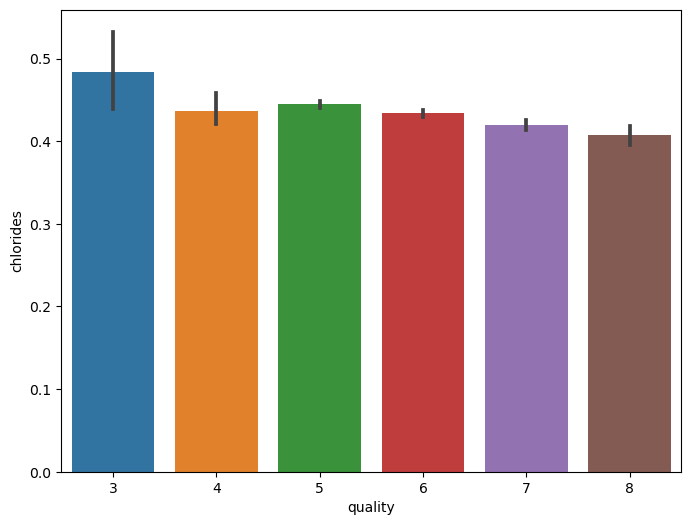

In [20]:
fig = plt.figure(figsize = (8,6))
sns.barplot(x = 'quality', y = 'chlorides', data = df)

**Observation**-: The optimal quality of wine, rated at 8, is observed to be achieved at approximately 75% chloride level. Levels exceeding this threshold do not add to the overall quality.

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

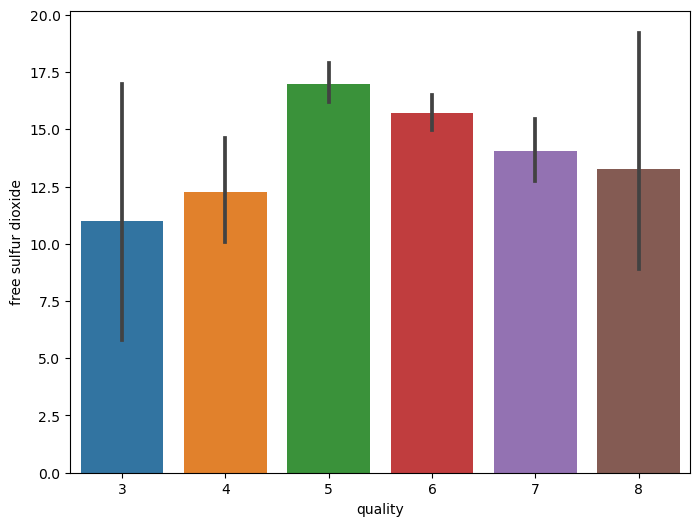

In [21]:
fig = plt.figure(figsize = (8,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = df)

**Observation**-: The presence of free sulfurdioxide in wine has a significant impact on its quality, reaching a peak at a certain level, after which further increases do not correspond to improvements in quality. In fact, once the free sulfurdioxide level exceeds approximately 60%, there is a decline in the overall quality of the wine.

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

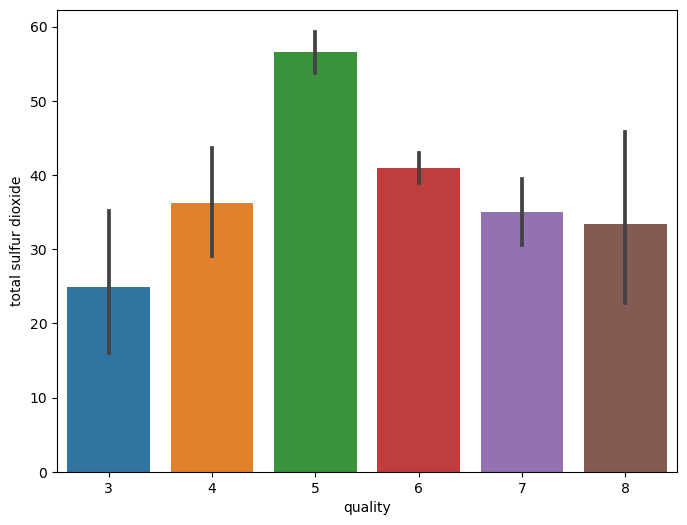

In [22]:
fig = plt.figure(figsize = (8,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = df)

The chemical composition of total sulfurdioxide closely resembles that of free sulfuroxide, but its effectiveness diminishes with higher concentrations.

<AxesSubplot:xlabel='quality', ylabel='density'>

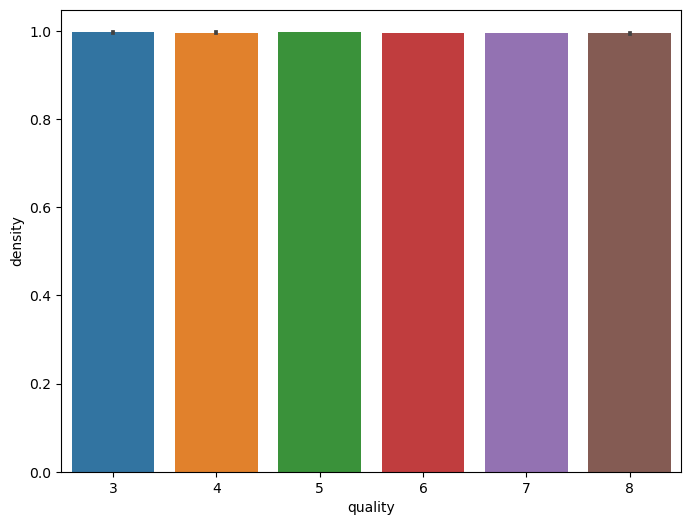

In [23]:
fig = plt.figure(figsize = (8,6))
sns.barplot(x = 'quality', y = 'density', data = df)

<AxesSubplot:xlabel='quality', ylabel='pH'>

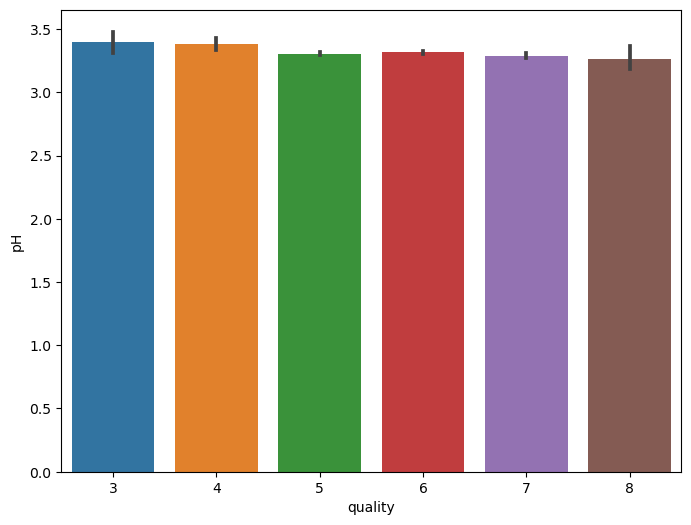

In [24]:
fig = plt.figure(figsize = (8,6))
sns.barplot(x = 'quality', y = 'pH', data = df)

The quality of wine is unaffected by variations in both density and pH levels, as these factors have comparable impacts on the overall quality of the product.

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

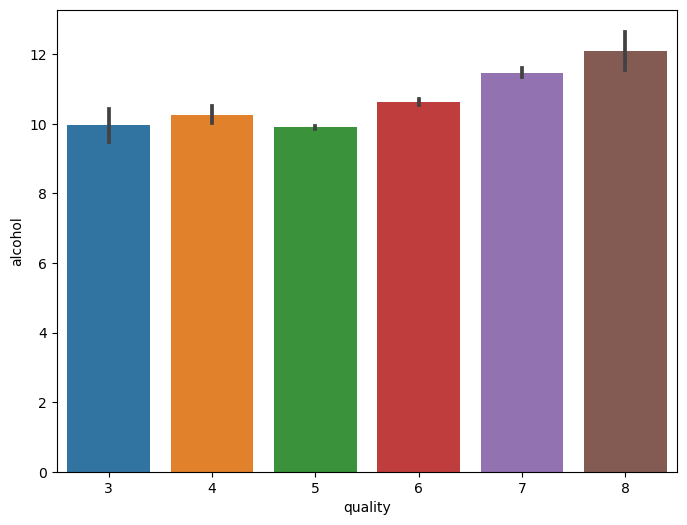

In [25]:
fig = plt.figure(figsize = (8,6))
sns.barplot(x = 'quality', y = 'alcohol', data = df)

Like sulfates, alcohol also has a significant impact on the quality of wine. The increase in alcohol levels is associated with an improvement in wine quality, as demonstrated by the bar plot.

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

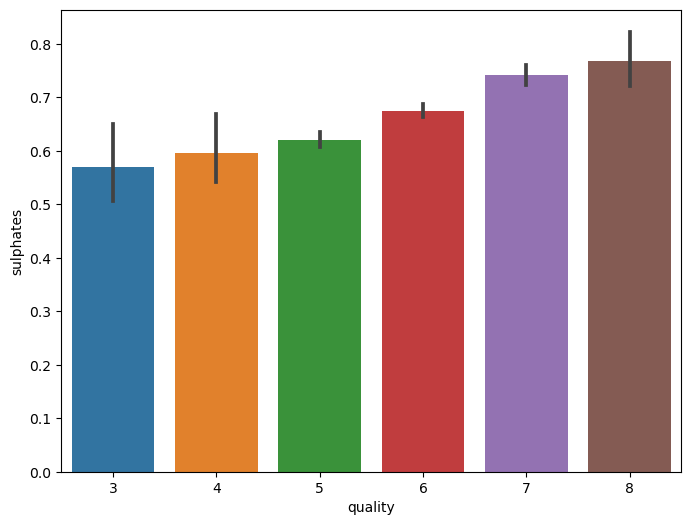

In [26]:
fig = plt.figure(figsize = (8,6))
sns.barplot(x = 'quality', y = 'sulphates', data = df)

The level of sulphates has been found to have a significant correlation with wine quality, with higher levels of sulphates corresponding to higher wine quality, as illustrated in the bar plot.

In [27]:
#Identifying the correlation between the variables and the target(quality)
corr = df.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.156909,0.149402,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.017826,0.094520,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.165255,0.192801,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.156909,0.017826,0.165255,1.000000,0.093468,0.164081,0.202485,0.401010,-0.091009,0.008899,0.071112,0.020657
chlorides,0.149402,0.094520,0.192801,0.093468,1.000000,0.001990,0.057508,0.303230,-0.282776,0.315637,-0.279034,-0.161767
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.164081,0.001990,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.202485,0.057508,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.401010,0.303230,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.091009,-0.282776,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.008899,0.315637,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


This gives the correlation between the dependent and independent variables.We can later visualize this by plotting heatmap.

In [28]:
#Show the correlation of variables with target in ascending order  
corr = df.corr()
corr['quality'].sort_values(ascending = False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.020657
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.161767
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

The above results display the correlation of independent variables with the dependent variable (wine quality) in ascending order. It is evident that alcohol, sulfates, citric acid, fixed acidity, and residual sugar have positive correlations, while the remaining variables have negative correlations. The positive correlations indicate the degree of positive impact each variable has on determining wine quality.

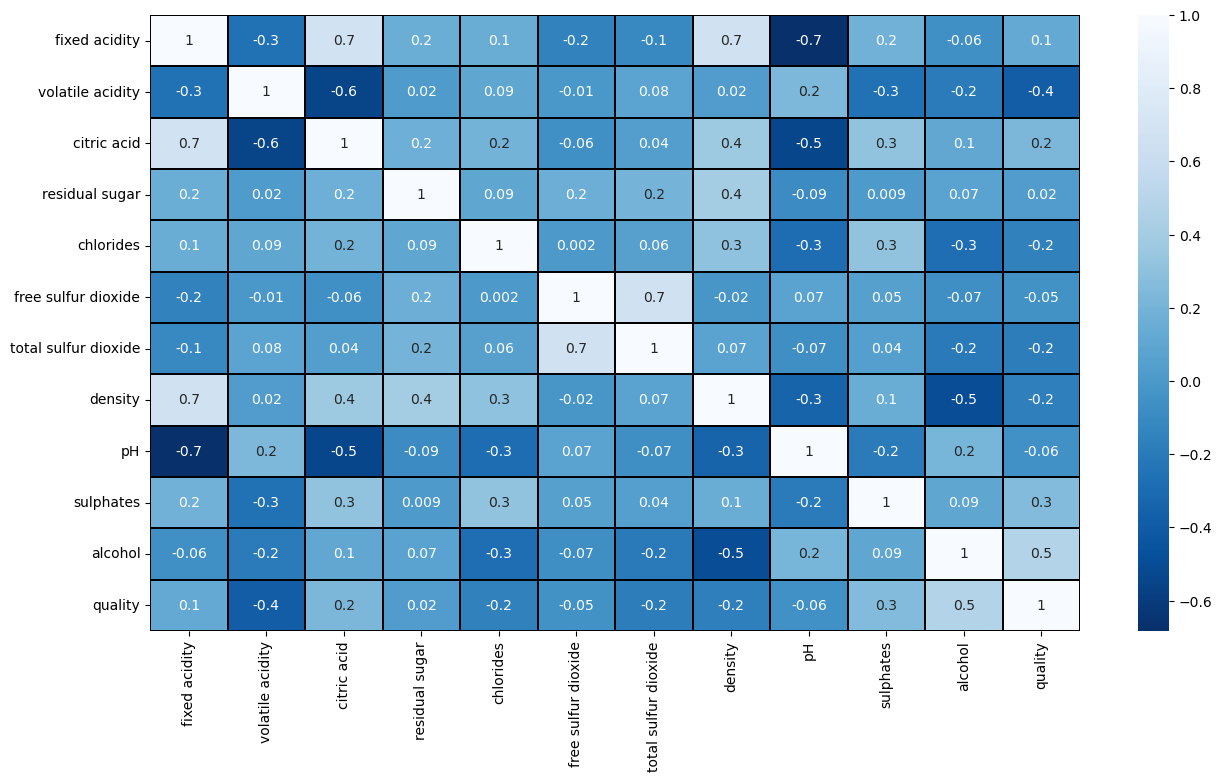

In [29]:
# Visualizing the correlation matrix using plotting heatmap
plt.figure(figsize = (15, 8))
sns.heatmap(df.corr(), linewidths = 0.1, fmt = ".1g", linecolor = "black", annot = True, cmap = "Blues_r")
plt.yticks(rotation = 0);
plt.show()

In [30]:
#0- no relation, -0.3 to +0.3- less correlation, greater than -0.5 or greater than +0.5- moderate correlation, greater than -0.7

This heatmap shows the correlation matrix by visualizing the data.We can observe the relationship between feature to feature and feature to label.This heatmap contains both positive and negative correlation.

1. There is no much positive correlation between the target and features.
2. The column fixed acidity,citric acid,residual sugar, sulphates and alcohol have positive correlation with the Label Column "quality".
3. The label is negatively correlated with volatile acidity,chlorides,free sulphure dioxide, total sulphure dioxide,density and pH.
4. Also the columns free sulfur dioxide and pH has very low correlation with the label,we can drop it if necessary.
5. The column  fixed acidity and citric acid, fixed acidity and dencity, free sulfure dioxide and total sulphure dioxide and many other columns have high correlation with each other.

**Visualizing the correlation between label and features using bar plot**

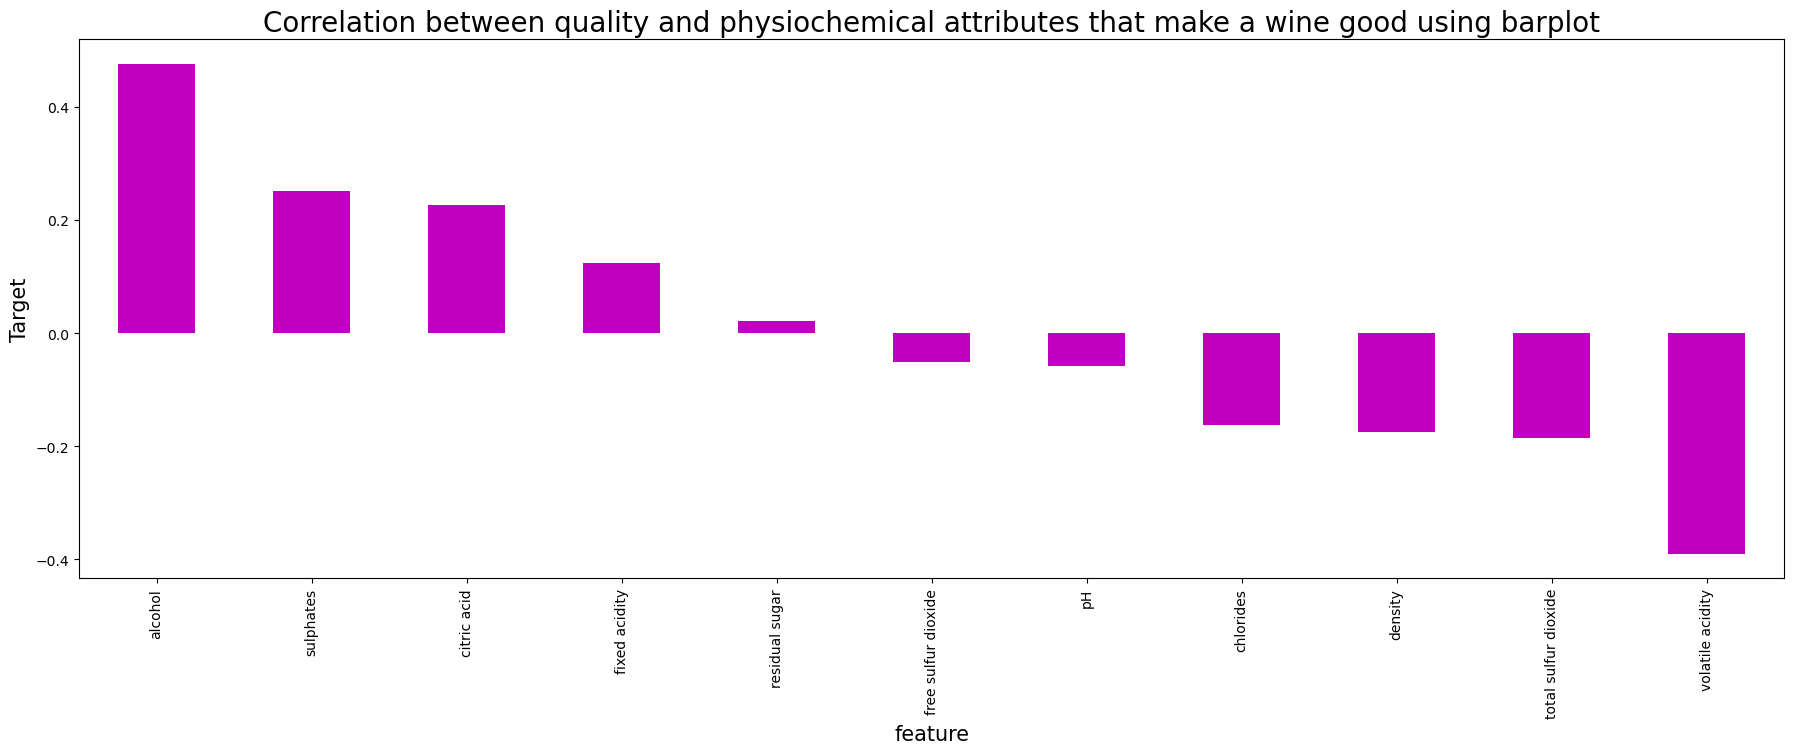

In [31]:
plt.figure(figsize = (22, 7))
df.corr()['quality'].sort_values(ascending = False).drop(['quality']).plot(kind='bar',color="m")
plt.xlabel('feature', fontsize = 15)
plt.ylabel('Target', fontsize = 15)
plt.title("Correlation between quality and physiochemical attributes that make a wine good using barplot", fontsize=20)
plt.show()

From the above bar plot we can notice the positive and negative correlation between the features and the target.Here the feature residual sugar have very less correlation with the column.

## Data Preprocessing

Preparing the data for training and modeling i.e.Splitting the data it into features (X) and the target variable (y), and then standardizing the features.

**Separating Features and label**

In [32]:
x = df.drop("quality", axis =1)
y = df["quality"]

In [33]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
x = pd.DataFrame(Scaler.fit_transform(x), columns = x.columns)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.552402,-0.242092,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.207150,0.455439,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.099231,0.276540,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.552402,-0.276838,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.552402,-0.242092,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.433557,0.215182,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294
1595,-1.390155,0.123905,-0.877968,-0.207258,-0.759603,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364
1596,-1.160343,-0.099554,-0.723916,-0.099231,-0.242092,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630
1597,-1.390155,0.654620,-0.775267,-0.433557,-0.276838,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308


To mitigate bias, we utilized the Standard Scalarization technique to adjust the scale of the data.

**Checking Variance Inflation Factor(VIF)**

In [34]:
# Determining the variance inflation factor in each scaled column i.e.x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i)
              for i in range(len(x.columns))]
vif["features"] = x.columns

vif

,VIF values,features
0,7.978083,fixed acidity
1,1.775184,volatile acidity
2,3.057287,citric acid
3,1.947825,residual sugar
4,1.467667,chlorides
5,1.948380,free sulfur dioxide
6,2.185398,total sulfur dioxide
7,7.201585,density
8,3.398635,pH
9,1.378918,sulphates


The problem of multicollinearity has been addressed, allowing us to move forward with the development of the model.

**Oversampling**

In [35]:
# Data Oversampling 
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1 = SM.fit_resample(x, y)

In [36]:
# check the value count of target column
y.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

It is clear from this analysis that the dataset exhibits imbalance, and since we are dealing with a classification problem, we will mitigate this imbalance by utilizing the oversampling method.

In [37]:
y1.value_counts()

5    681
6    681
7    681
4    681
8    681
3    681
Name: quality, dtype: int64

Once we have obtained a balanced dataset, we can move forward with building machine learning classification models.

In [38]:
# Spliting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# ML Modeling,Evaluation,Training and Predictions

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

**Logistic Regression**

In [40]:
# Creating a Logistic Regression model
logistic_regression = LogisticRegression(random_state=42)

In [41]:
# Training the model
logistic_regression.fit(x_train, y_train)

LogisticRegression(random_state=42)

Logistic Regression Accuracy: 0.57
Confusion Matrix:
[[ 0  0  1  0  0  0]
 [ 0  1  7  2  0  0]
 [ 0  0 98 32  0  0]
 [ 0  0 46 75 11  0]
 [ 0  0  3 31  8  0]
 [ 0  0  0  1  4  0]]
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       1.00      0.10      0.18        10
           5       0.63      0.75      0.69       130
           6       0.53      0.57      0.55       132
           7       0.35      0.19      0.25        42
           8       0.00      0.00      0.00         5

    accuracy                           0.57       320
   macro avg       0.42      0.27      0.28       320
weighted avg       0.55      0.57      0.54       320



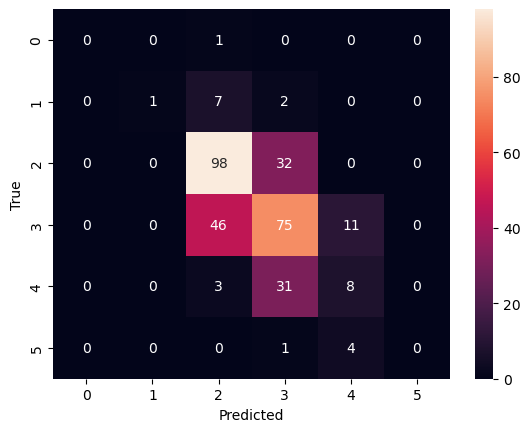

In [42]:
# Evaluating the logistic regression model
y_pred_logistic = logistic_regression.predict(x_test)

# Calculating the accuracy
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print(f"Logistic Regression Accuracy: {accuracy_logistic:.2f}")

# Displaying the confusion matrix and classification report
confusion_logistic = confusion_matrix(y_test, y_pred_logistic)
print("Confusion Matrix:")
print(confusion_logistic)

classification_rep_logistic = classification_report(y_test, y_pred_logistic)
print("Classification Report:")
print(classification_rep_logistic)

# Creating a heatmap for the confusion matrix
sns.heatmap(confusion_logistic, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**Random Forest Classifier**

In [43]:
# Training the Random forest Classifier
rfc_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rfc_classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [44]:
# Making predictions on the test set
y_pred = rfc_classifier.predict(x_test)

Accuracy: 0.65
Confusion Matrix:
[[ 0  0  1  0  0  0]
 [ 0  0  7  3  0  0]
 [ 0  0 96 33  1  0]
 [ 0  1 32 90  8  1]
 [ 0  0  0 19 22  1]
 [ 0  0  0  1  4  0]]
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.71      0.74      0.72       130
           6       0.62      0.68      0.65       132
           7       0.63      0.52      0.57        42
           8       0.00      0.00      0.00         5

    accuracy                           0.65       320
   macro avg       0.33      0.32      0.32       320
weighted avg       0.62      0.65      0.64       320



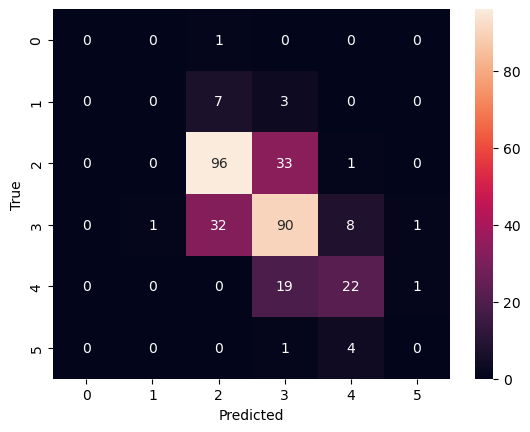

In [45]:
# Calculating the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Displaying the confusion matrix and classification report
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

# Creating a heatmap for the confusion matrix
sns.heatmap(confusion_mat, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**K-Nearest Neighbors (KNN)**

In [46]:
# Creating a KNN model
knn_classifier = KNeighborsClassifier(n_neighbors=5)

In [47]:
# Training the model
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier()

K-Nearest Neighbors Accuracy: 0.54
Confusion Matrix:
[[ 0  0  0  1  0  0]
 [ 1  0  3  6  0  0]
 [ 0  1 86 41  2  0]
 [ 0  0 50 72 10  0]
 [ 0  1  6 20 14  1]
 [ 0  0  1  1  3  0]]
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.59      0.66      0.62       130
           6       0.51      0.55      0.53       132
           7       0.48      0.33      0.39        42
           8       0.00      0.00      0.00         5

    accuracy                           0.54       320
   macro avg       0.26      0.26      0.26       320
weighted avg       0.51      0.54      0.52       320



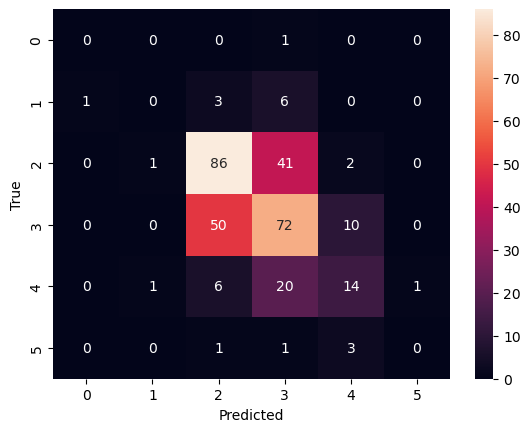

In [48]:
# Evaluating the model
y_pred_knn = knn_classifier.predict(x_test)

# Calculating the model accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"K-Nearest Neighbors Accuracy: {accuracy_knn:.2f}")

# Displaying confusion matrix and classification report
confusion_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:")
print(confusion_knn)

classification_rep_knn = classification_report(y_test, y_pred_knn)
print("Classification Report:")
print(classification_rep_knn)

# Creating a heatmap for the confusion matrix
sns.heatmap(confusion_knn, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**Observation** The Random Forest model demonstrated the highest accuracy rate of 65%, exhibiting differing performance levels across different quality categories. Logistic Regression, on the other hand, yielded a lower accuracy rate of 57% and exhibited improved precision for level 4 but unbalanced recall. The KNN Classifier displayed the lowest accuracy rate at 54% and exhibited comparable performance trends.

**Saving the Model**

In [49]:
# Saving the model using .pkl
import joblib
joblib.dump(rfc_classifier, "Red Wine Quality Predition.pki")

['Red Wine Quality Predition.pki']

**Predicting the saved model**

In [50]:
# loading the saved model and get the predictions
model = joblib.load("Red Wine Quality Predition.pki")

# prediction
prediction = rfc_classifier.predict(x_test)
prediction

array([5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 7, 5, 6, 5, 6, 6, 5, 6, 7, 5, 5, 6,
       5, 6, 5, 6, 7, 5, 5, 6, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6, 5, 5, 6, 5,
       6, 6, 6, 6, 5, 6, 5, 5, 6, 7, 5, 6, 6, 5, 6, 5, 6, 6, 6, 5, 7, 6,
       7, 6, 7, 5, 6, 5, 6, 6, 6, 5, 7, 5, 6, 6, 5, 7, 5, 6, 6, 6, 5, 6,
       7, 5, 6, 6, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 6, 7, 6, 7, 6, 5, 6, 5,
       7, 5, 7, 5, 5, 6, 5, 5, 5, 6, 6, 6, 6, 5, 6, 5, 6, 5, 5, 6, 6, 5,
       5, 6, 6, 5, 5, 5, 5, 6, 7, 6, 7, 6, 6, 5, 5, 6, 6, 5, 6, 6, 5, 5,
       6, 5, 6, 6, 5, 6, 7, 6, 6, 5, 5, 6, 6, 5, 5, 5, 5, 5, 7, 5, 7, 6,
       6, 5, 5, 5, 5, 6, 5, 6, 5, 7, 6, 6, 7, 5, 6, 6, 5, 6, 6, 5, 5, 6,
       5, 7, 5, 5, 5, 5, 7, 6, 5, 6, 6, 6, 8, 5, 5, 6, 6, 6, 6, 5, 6, 6,
       6, 6, 6, 6, 6, 5, 5, 7, 5, 5, 5, 5, 7, 6, 5, 7, 5, 6, 6, 5, 5, 5,
       6, 7, 5, 7, 6, 6, 7, 5, 6, 5, 5, 6, 6, 5, 5, 4, 6, 6, 6, 6, 5, 7,
       6, 7, 5, 5, 6, 6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 7, 5, 5, 5, 5, 7,
       5, 6, 5, 6, 5, 6, 8, 5, 5, 6, 5, 7, 6, 6, 5,

These are the predicted wine quality values.

In [51]:
a = np.array(y_test)
df = pd.DataFrame()
df["predicted"] = prediction
df["original"] = a
df

,predicted,original
0,5,6
1,5,5
2,5,6
3,5,5
4,6,6
...,...,...
315,6,6
316,5,5
317,5,5
318,6,6


The above table presents a comparison between the anticipated and initial quality levels of red wine samples. In numerous cases, the forecasted quality aligns with the original, suggesting precise classification through the utilization of the Random Forest classification Model.

**END**